In [1]:
import excursion.testcases.fast_2D as testcase_2D
import excursion.testcases.fast_1D as testcase_1D
import excursion.testcases.fast_3D as testcase_3D
from excursion import *
from excursion.optimizer.builders import *

In [2]:
device_opt = ['cuda', 'cpu']
dtype = torch.float64
n_initial_points = 3
jump_start_opt = [True, False]
model_type_opt = ['ExactGP', 'GridGP']
model_fit_opt = ['Adam', 'LBFGS']
likelihood_options = [0.0, 0.2]
acq_opt = ['pes', 'mes']

device_str = device_opt[0]
device = torch.device(device_str)
jump_start = jump_start_opt[0]
model_type = model_type_opt[1]
fit_optimizer = model_fit_opt[0]
acq_type = acq_opt[1]

base_model_kwargs = {}
base_model_kwargs['device'] = device
base_model_kwargs['dtype'] = dtype
base_model_kwargs['likelihood_type'] = 'GaussianLikelihood'
base_model_kwargs['epsilon'] = likelihood_options[1]


In [3]:
bounding_box=[[0.0, 1.5]]
ndim = 3
problem_three_details = ExcursionProblem(thresholds=[0.0], bounding_box=bounding_box*ndim, ndim=ndim,
                                         grid_step_size=[30] * ndim, functions=testcase_3D.true_functions)


ndim = 2
problem_two_details = ExcursionProblem(thresholds=[0.0], bounding_box=bounding_box*ndim, ndim=ndim,
                                       grid_step_size=[41]*ndim,
                                       functions=testcase_2D.true_functions)

ndim = 1
problem_one_details = ExcursionProblem(thresholds=[0.0], bounding_box=bounding_box, ndim=ndim,
                                       grid_step_size=[100],
                                       functions=[testcase_1D.function_1])
if jump_start:
   plus_iterations = 0
else:
    plus_iterations = n_initial_points

C:\Users\excursion\anaconda3\envs\jason_refactor\lib\site-packages\numpy\lib\index_tricks.py:185: ComplexWarning: Casting complex values to real discards the imaginary part
  nn[k] = (nn[k]*step+start)


<Figure size 432x288 with 0 Axes>

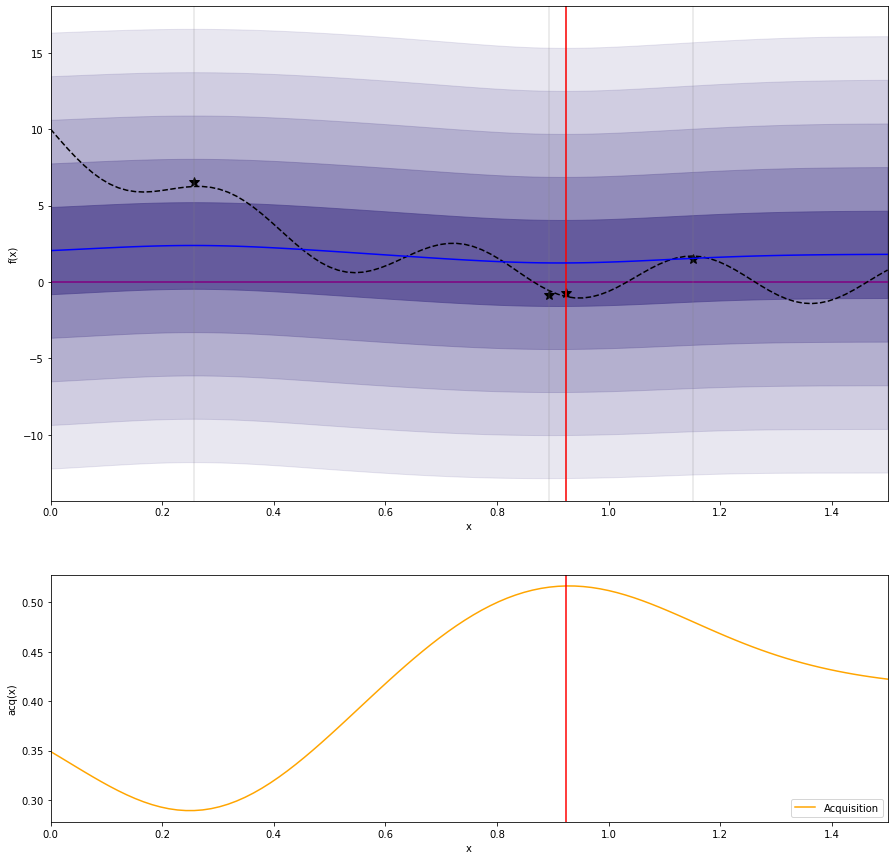

<Figure size 432x288 with 0 Axes>

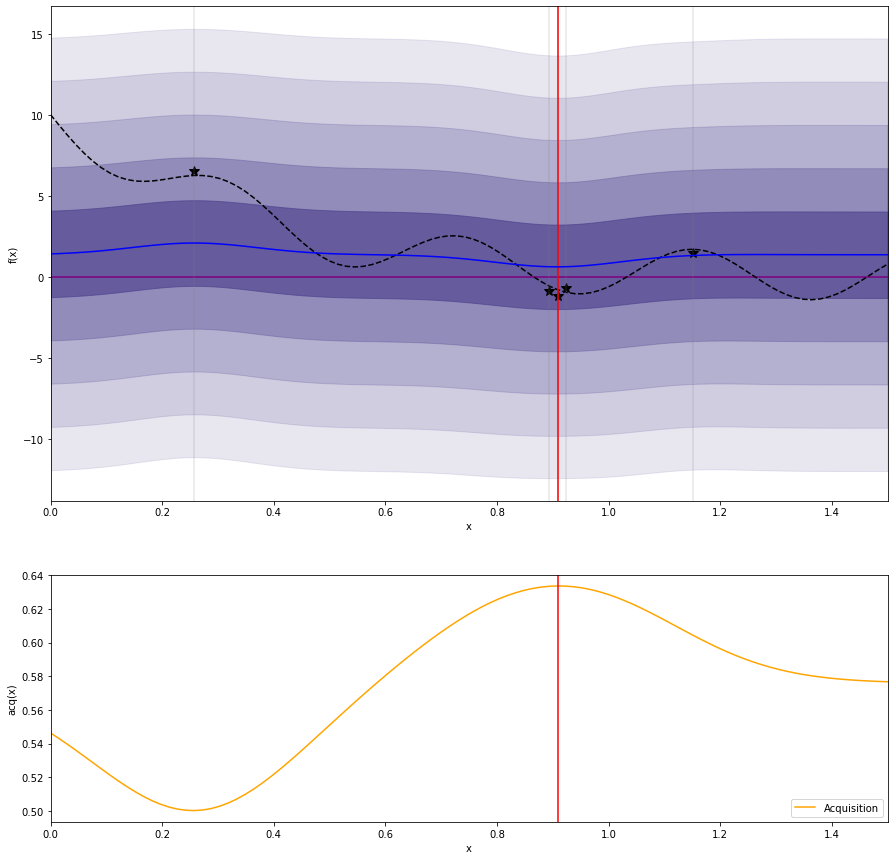

<Figure size 432x288 with 0 Axes>

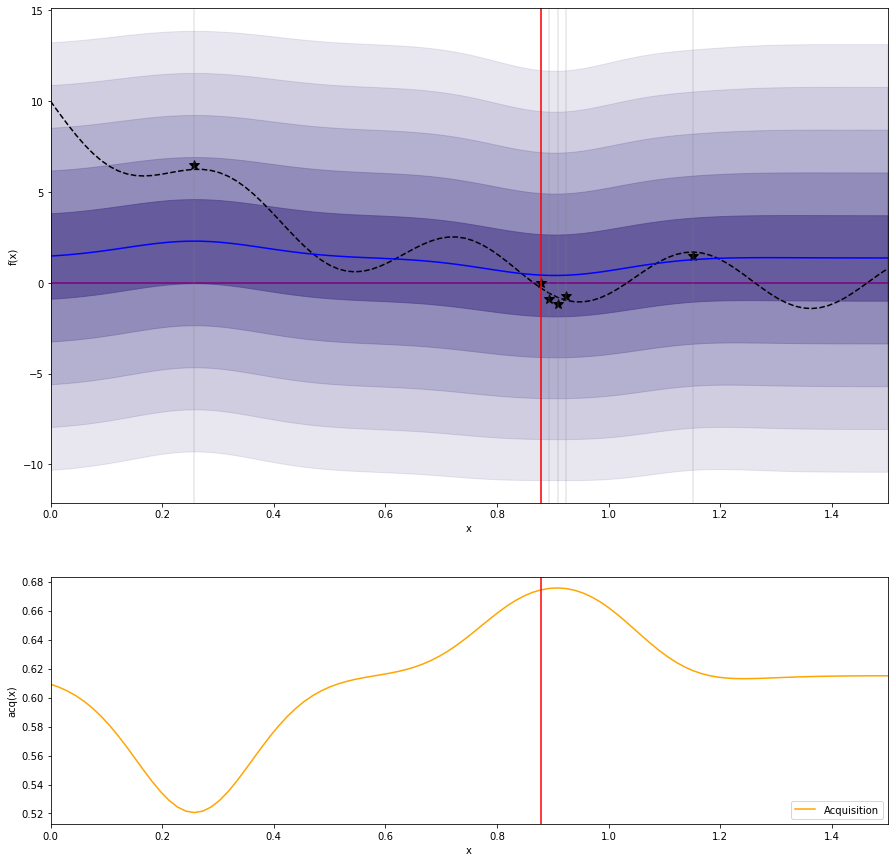

<Figure size 432x288 with 0 Axes>

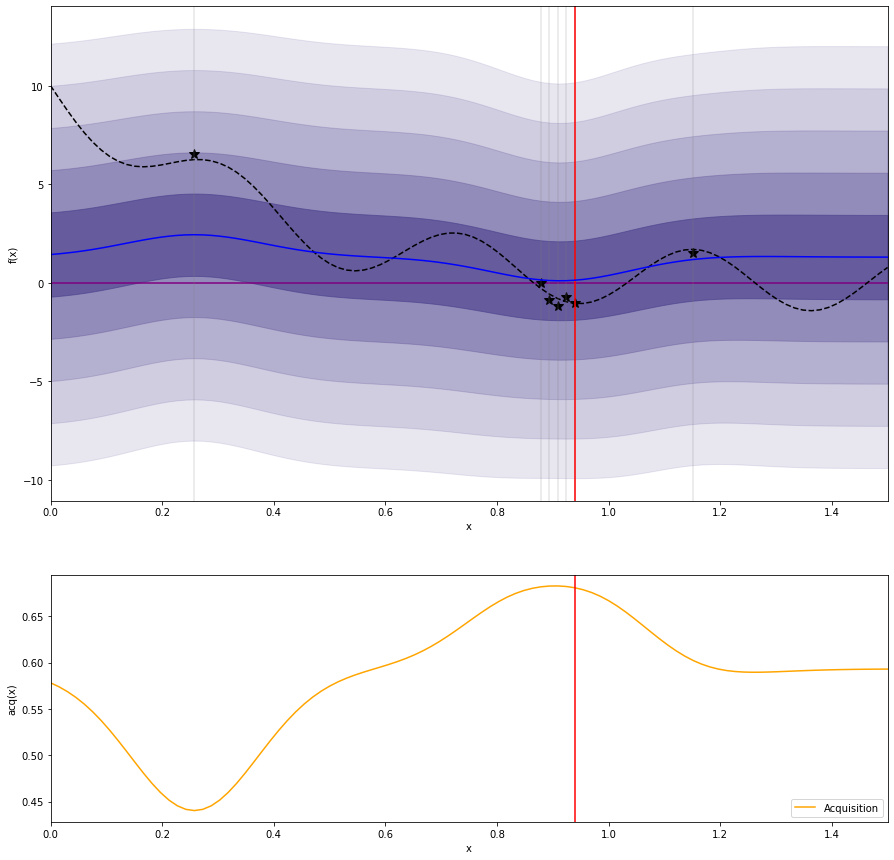

<Figure size 432x288 with 0 Axes>

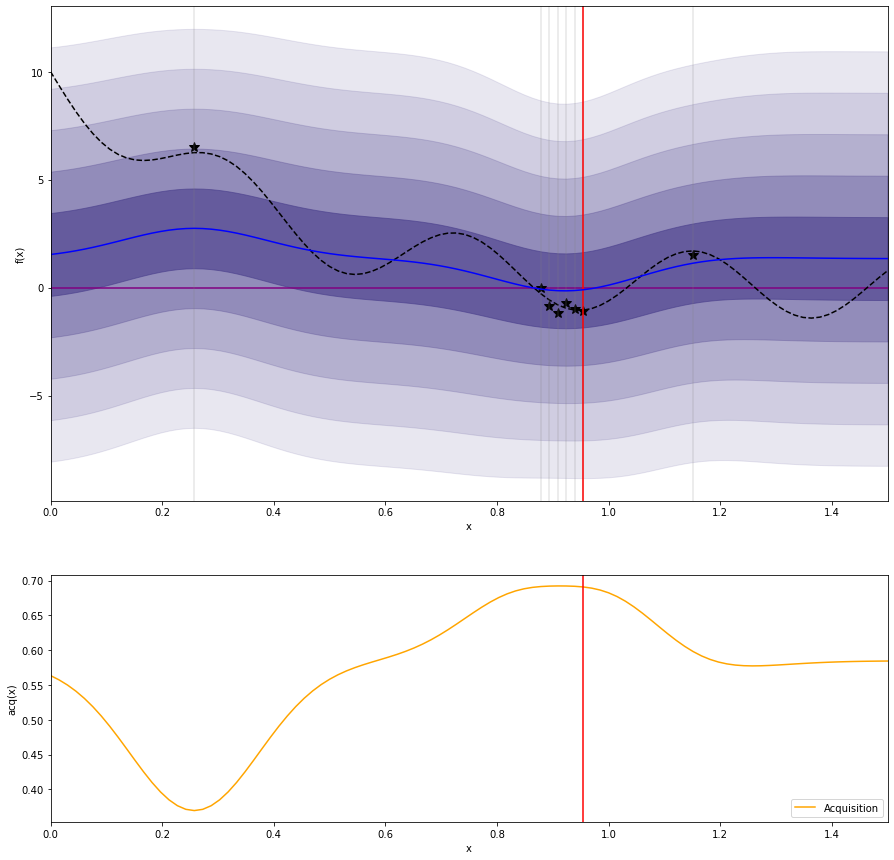

<Figure size 432x288 with 0 Axes>

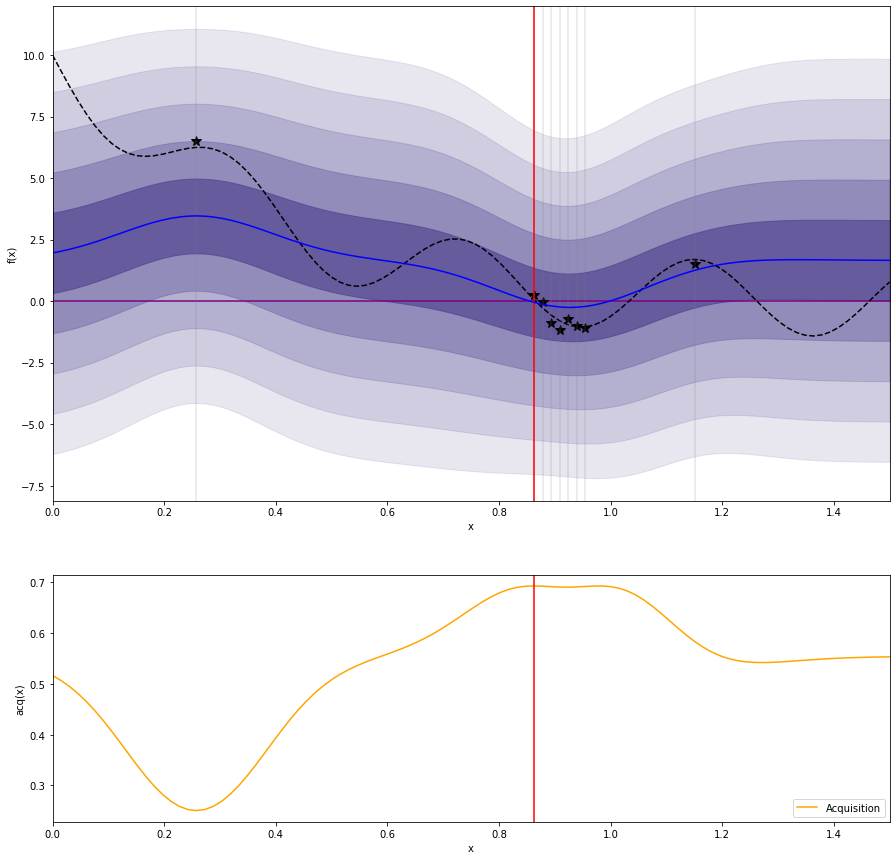

<Figure size 432x288 with 0 Axes>

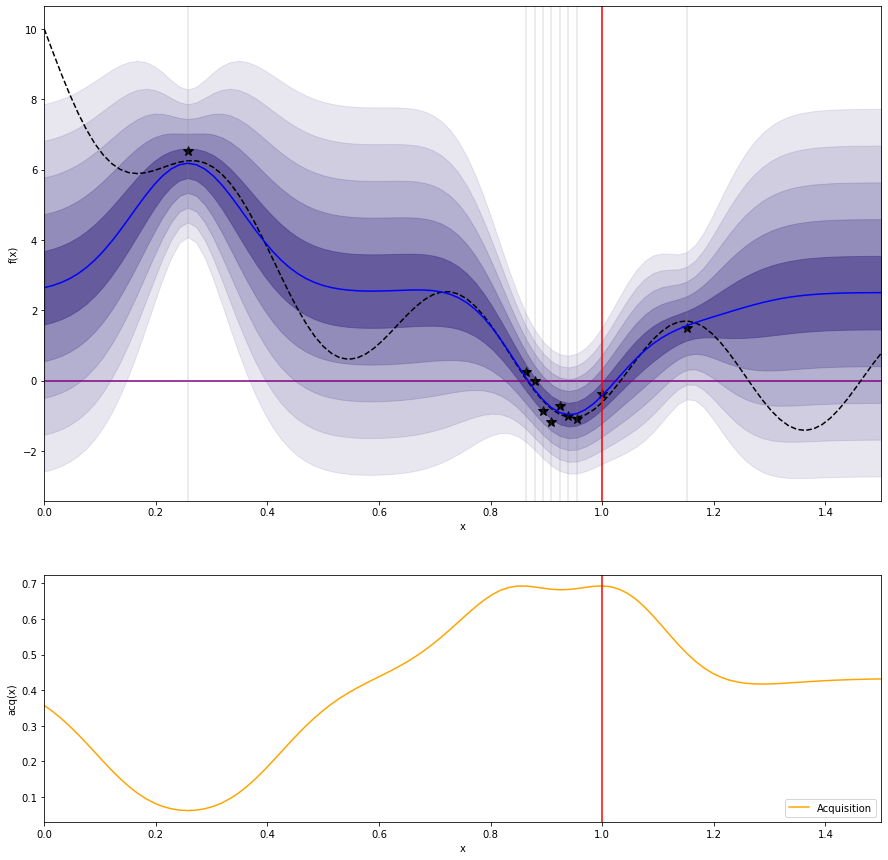

<Figure size 432x288 with 0 Axes>

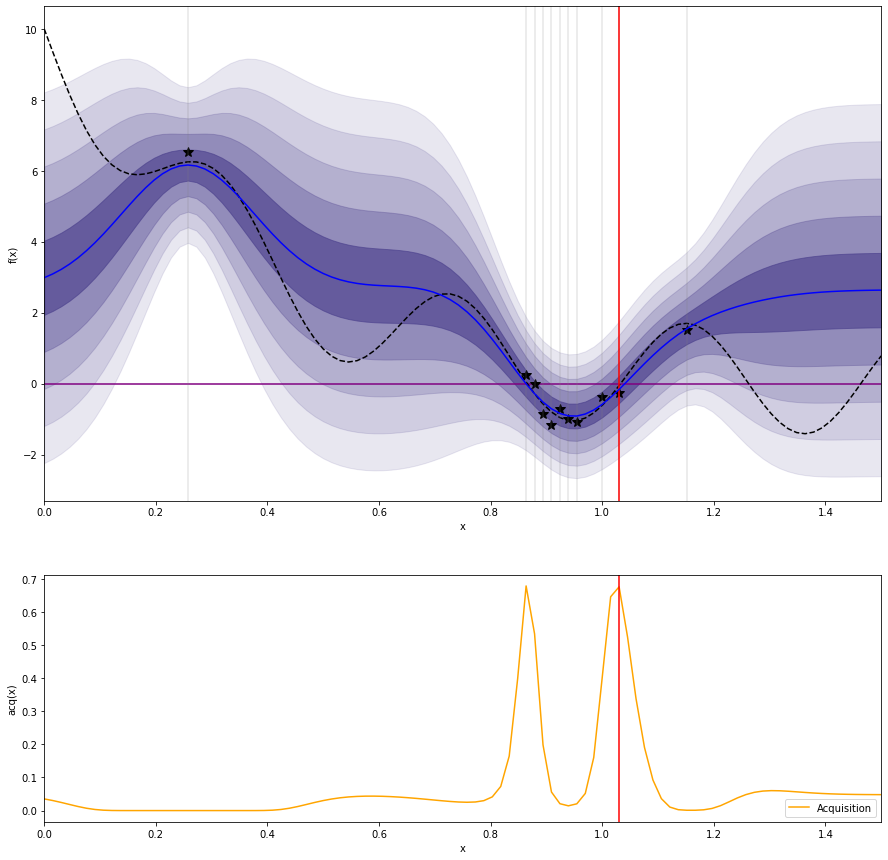

<Figure size 432x288 with 0 Axes>

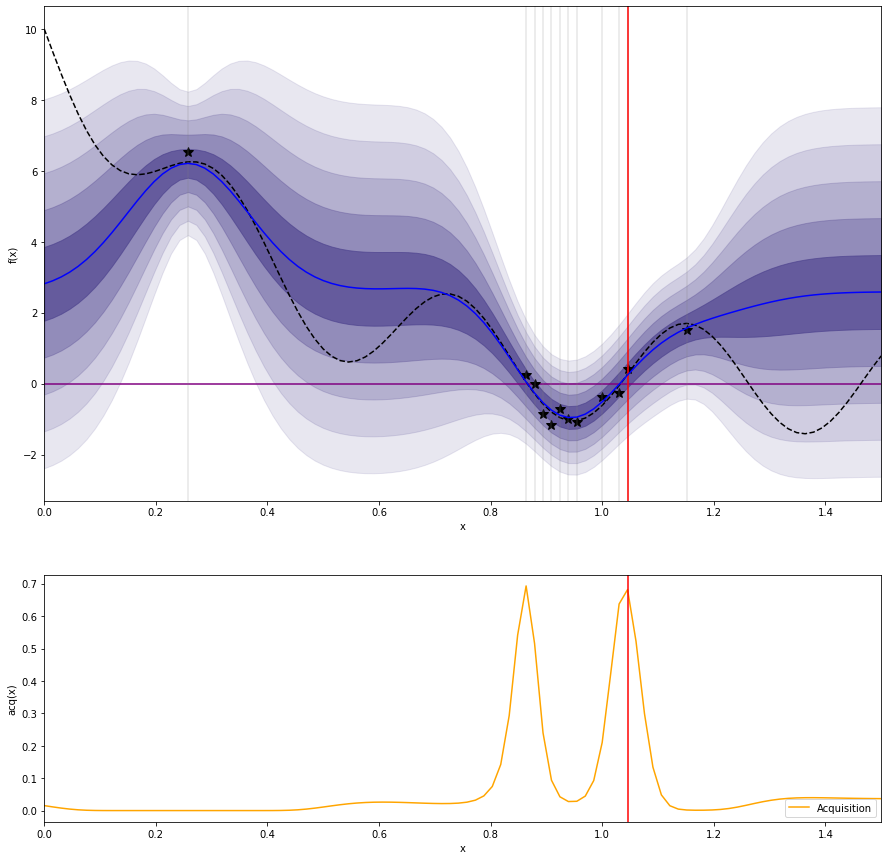

<Figure size 432x288 with 0 Axes>

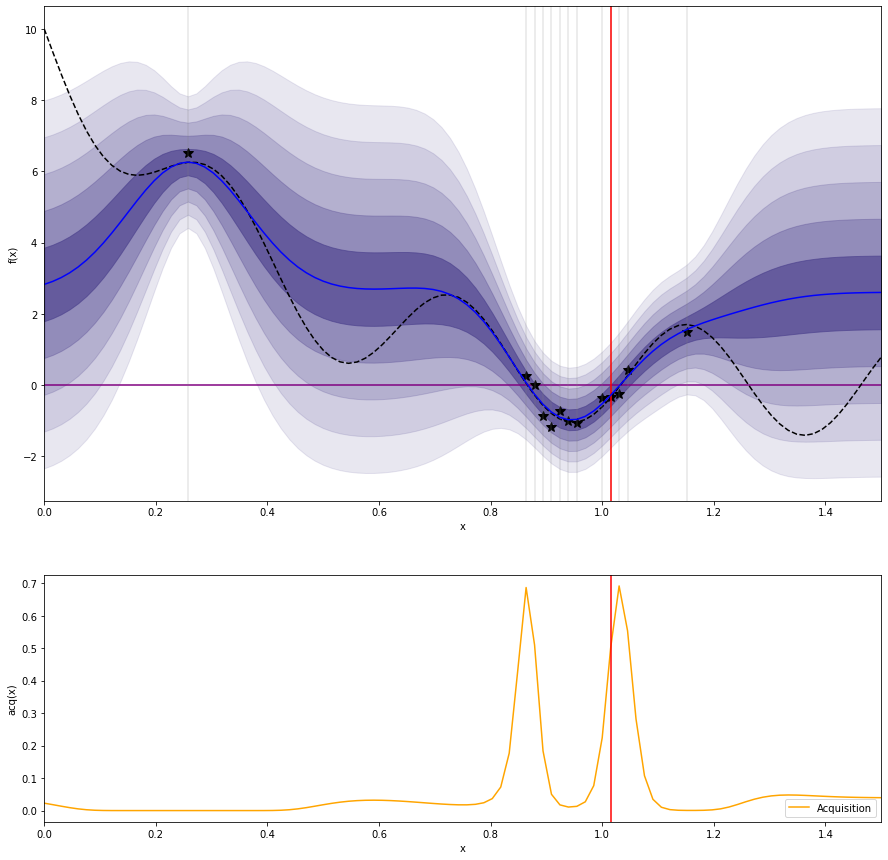

C:\Users\excursion\Documents\excursion_project\excursion\excursion\plotting.py:125: UserWarning: No contour levels were found within the data range.
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="white", linestyles='solid')


<Figure size 432x288 with 0 Axes>

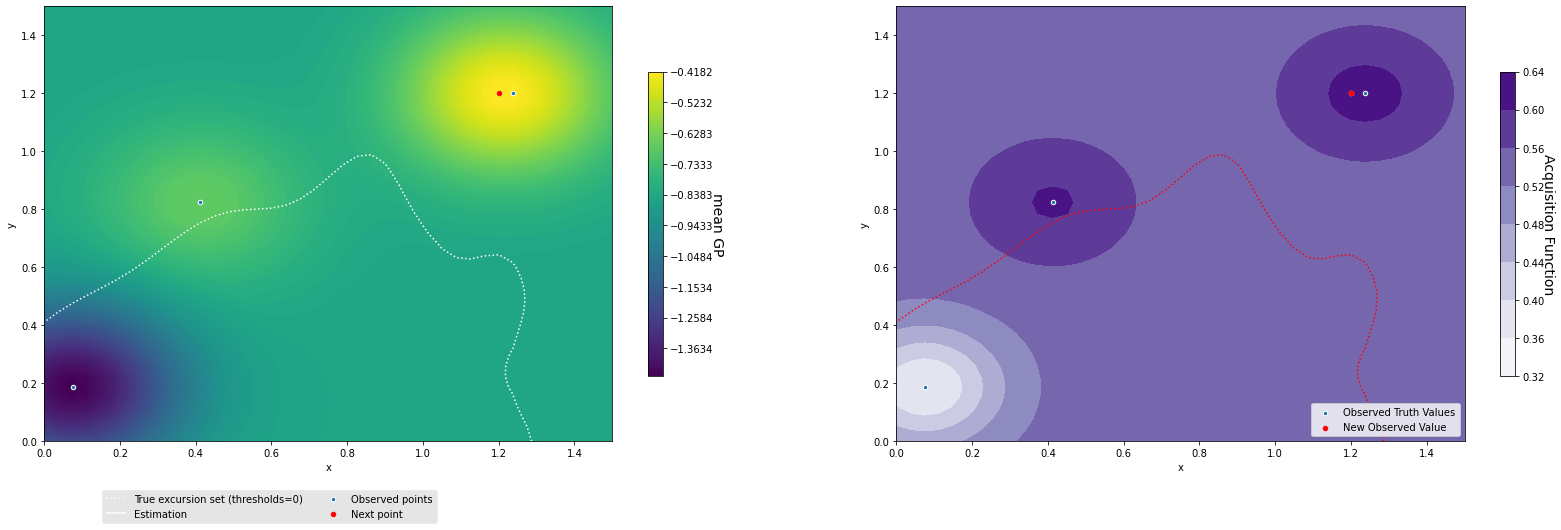

<Figure size 432x288 with 0 Axes>

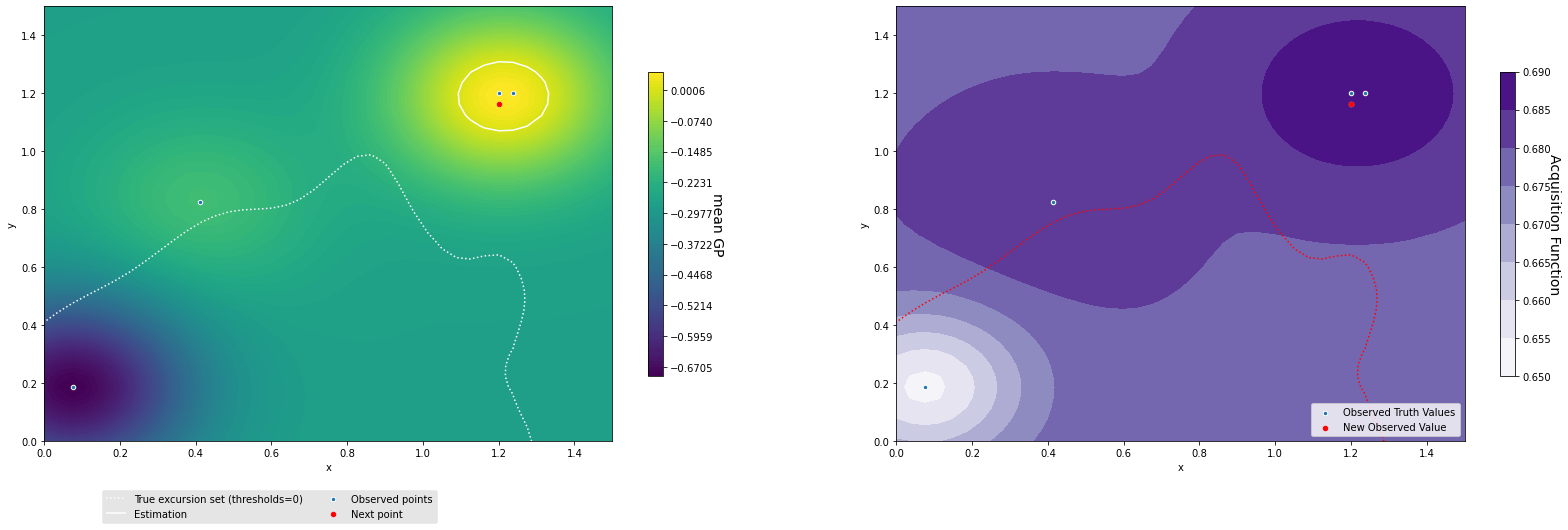

<Figure size 432x288 with 0 Axes>

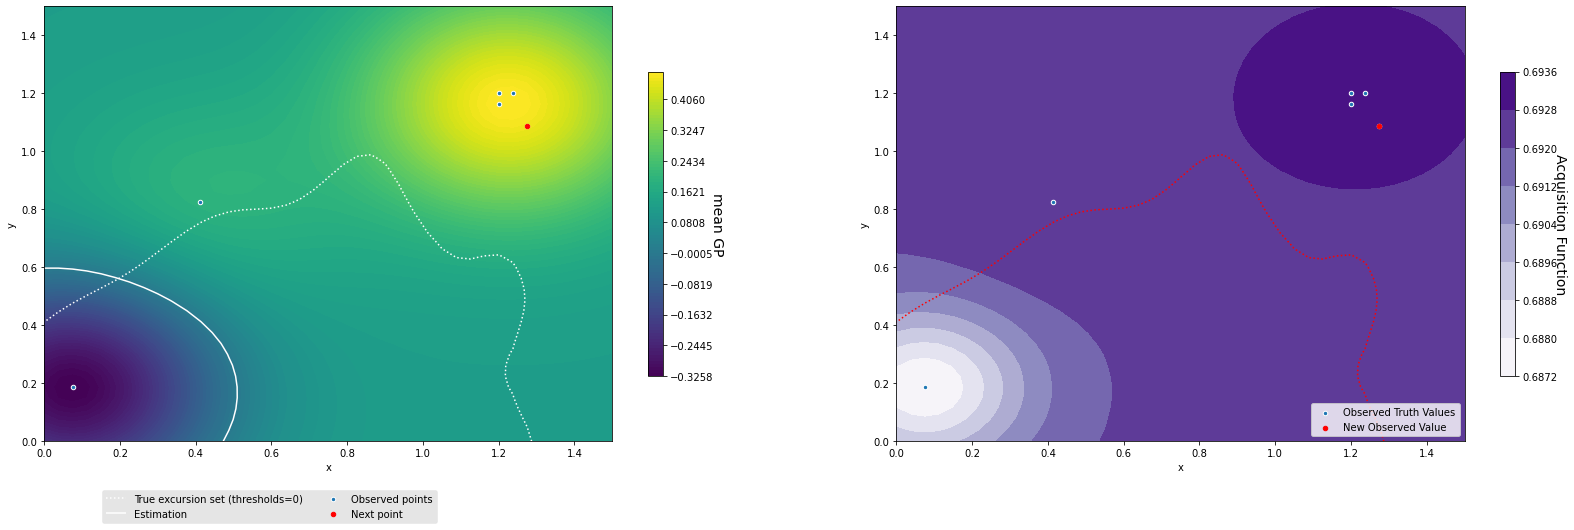

C:\Users\excursion\Documents\excursion_project\excursion\excursion\plotting.py:125: UserWarning: No contour levels were found within the data range.
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="white", linestyles='solid')


<Figure size 432x288 with 0 Axes>

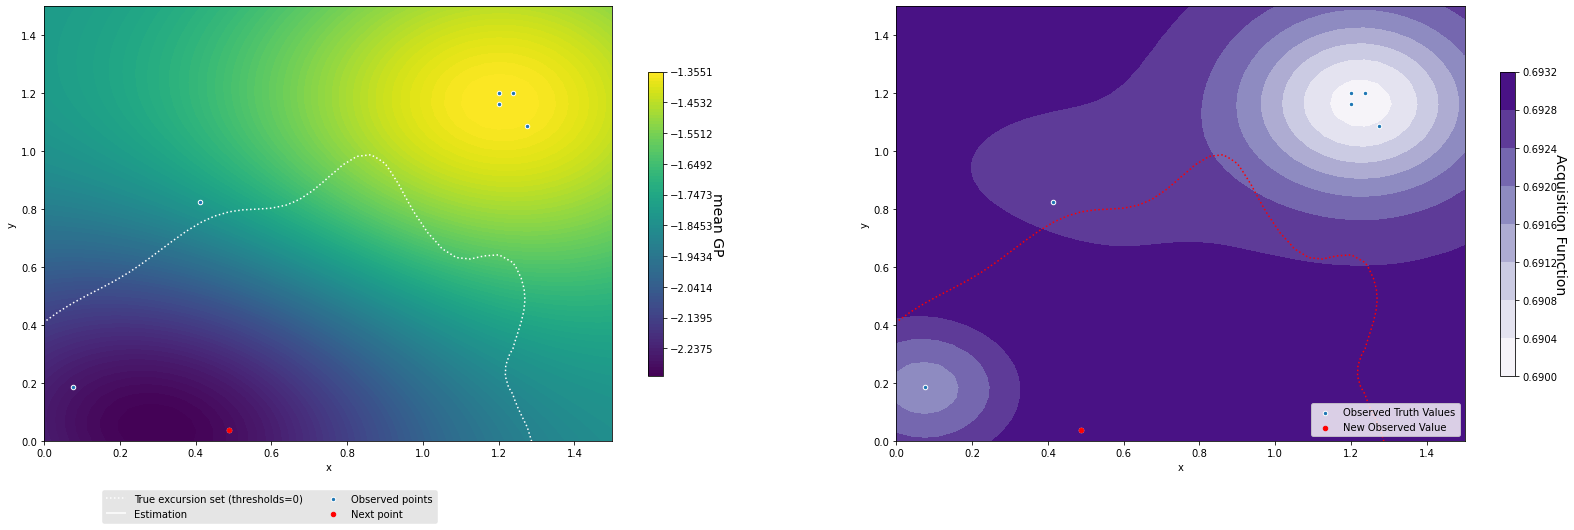

C:\Users\excursion\Documents\excursion_project\excursion\excursion\plotting.py:125: UserWarning: No contour levels were found within the data range.
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="white", linestyles='solid')


<Figure size 432x288 with 0 Axes>

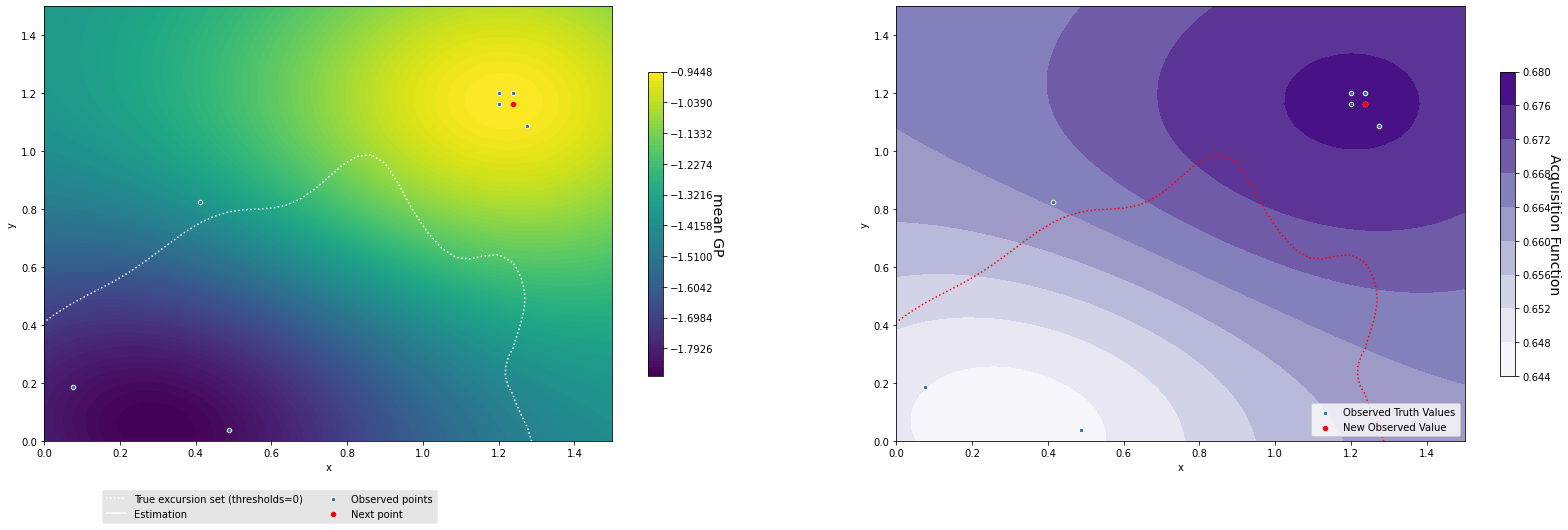

C:\Users\excursion\Documents\excursion_project\excursion\excursion\plotting.py:125: UserWarning: No contour levels were found within the data range.
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="white", linestyles='solid')


<Figure size 432x288 with 0 Axes>

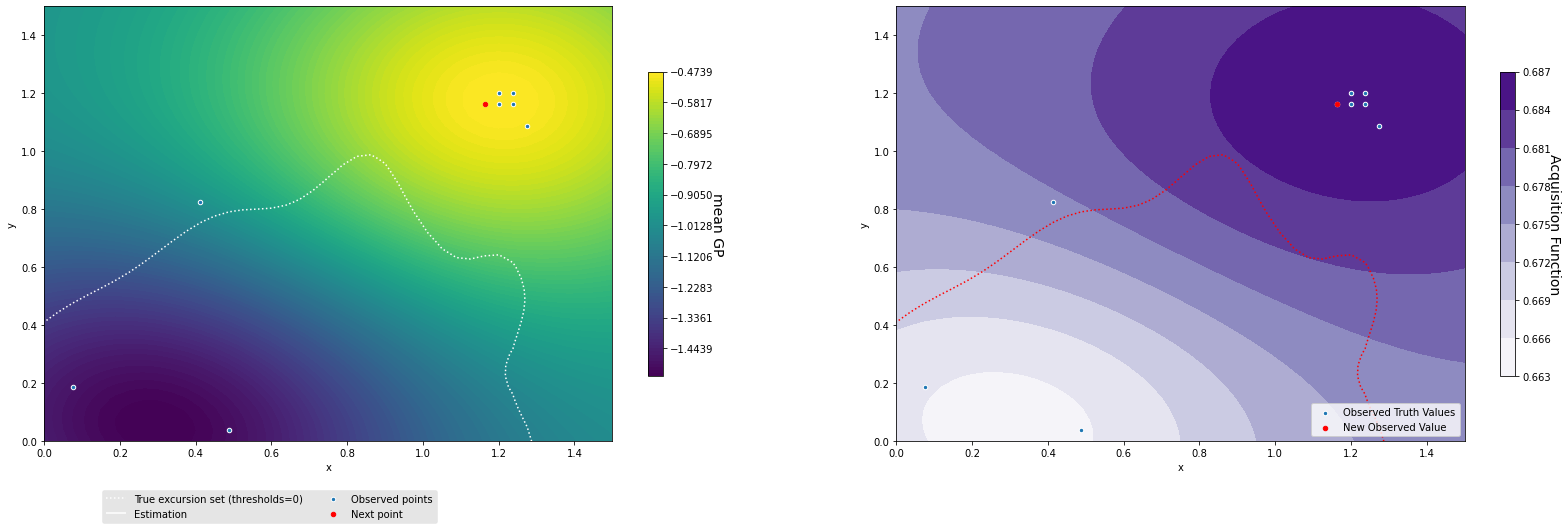

C:\Users\excursion\Documents\excursion_project\excursion\excursion\plotting.py:125: UserWarning: No contour levels were found within the data range.
  line2 = fig_ax1.contour(xv, yv, pred_mean, thresholds, colors="white", linestyles='solid')


<Figure size 432x288 with 0 Axes>

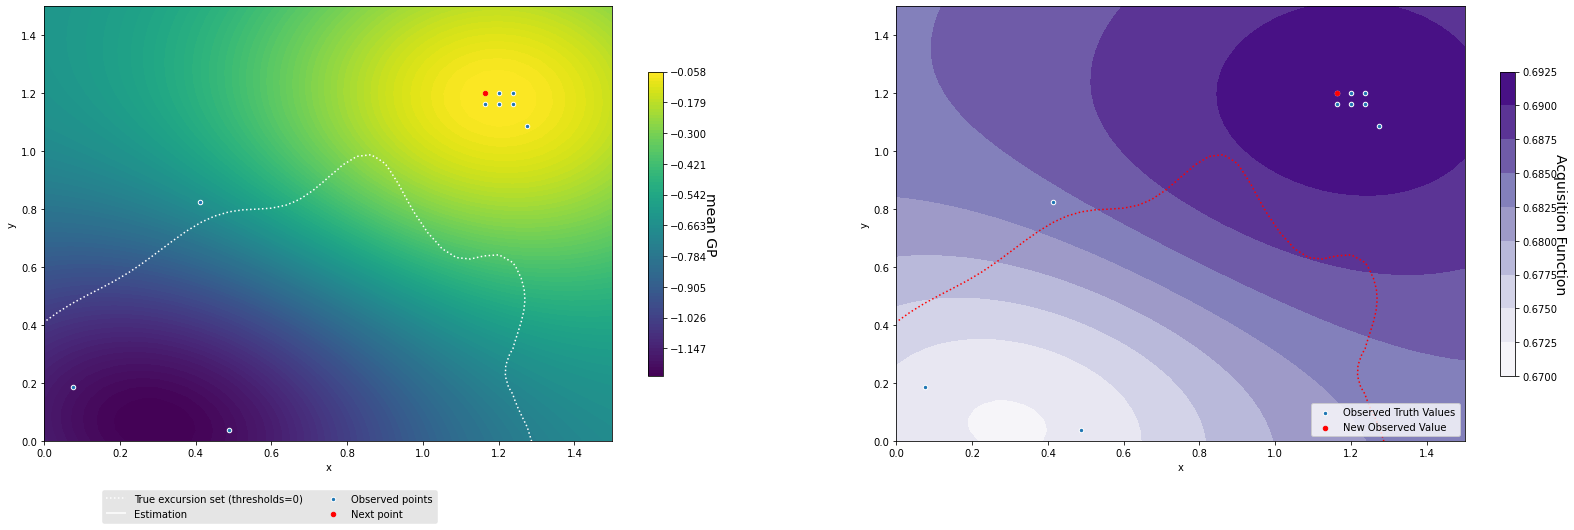

<Figure size 432x288 with 0 Axes>

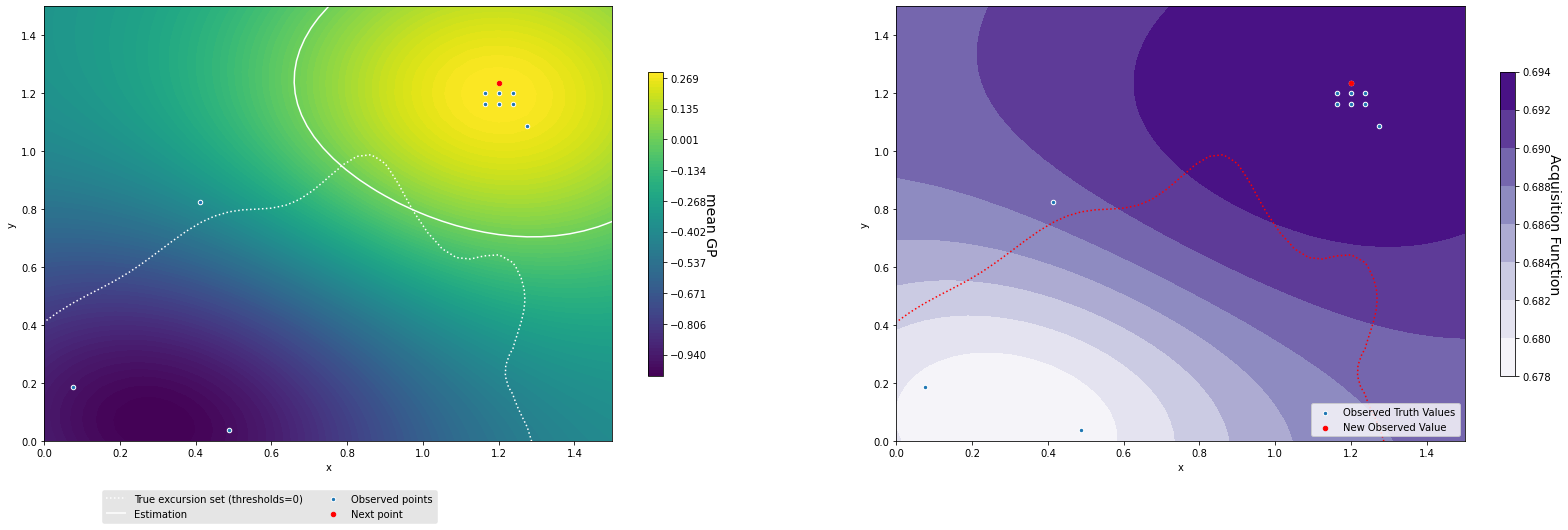

<Figure size 432x288 with 0 Axes>

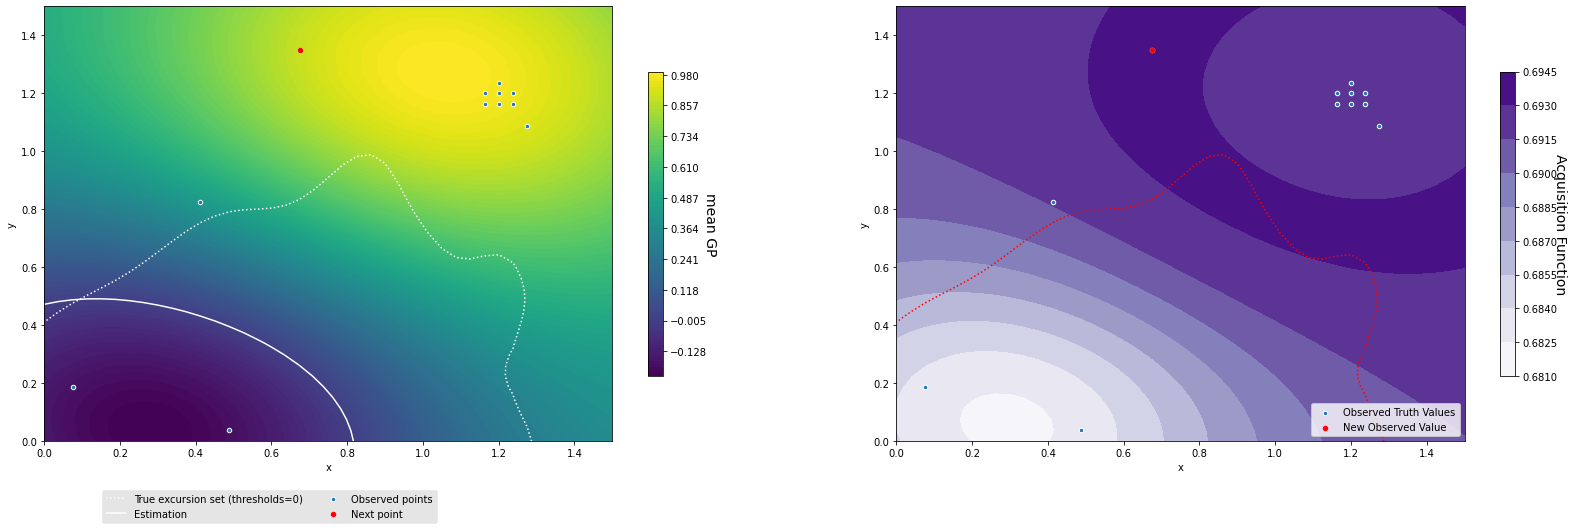

<Figure size 432x288 with 0 Axes>

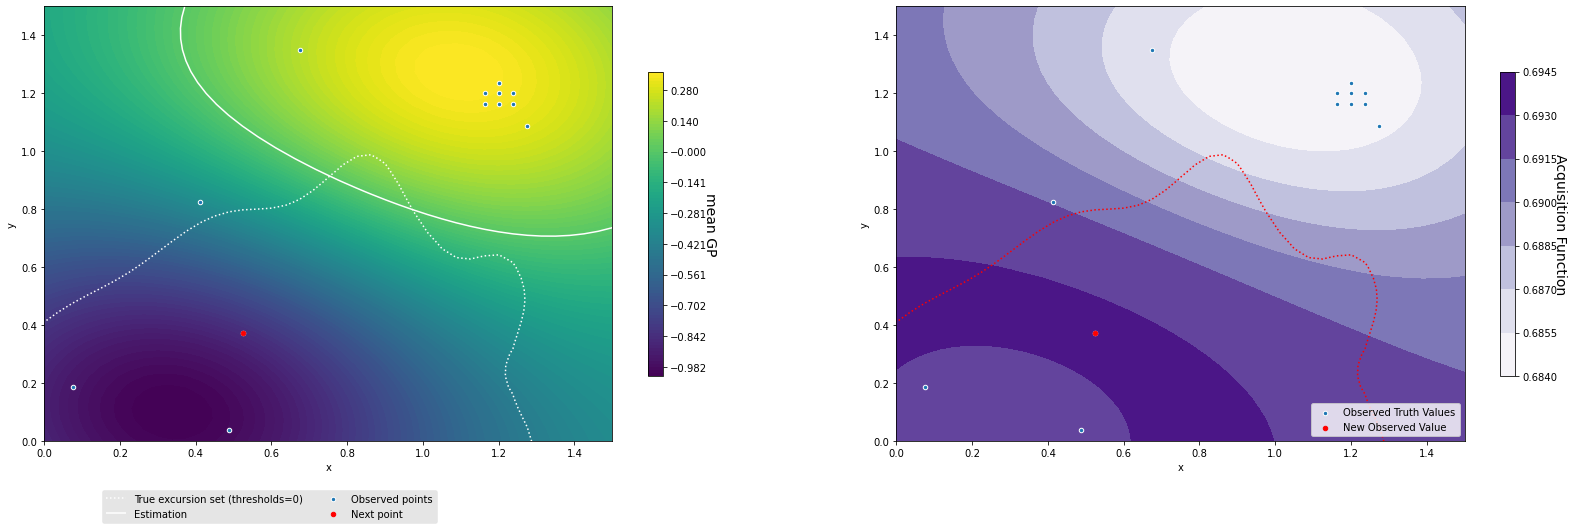

Surface level must be within volume data range.
Going to skip plotting and keep training

Surface level must be within volume data range.
Going to skip plotting and keep training

Surface level must be within volume data range.
Going to skip plotting and keep training

Surface level must be within volume data range.
Going to skip plotting and keep training

Surface level must be within volume data range.
Going to skip plotting and keep training

Surface level must be within volume data range.
Going to skip plotting and keep training

Surface level must be within volume data range.
Going to skip plotting and keep training

Surface level must be within volume data range.
Going to skip plotting and keep training

Surface level must be within volume data range.
Going to skip plotting and keep training

Surface level must be within volume data range.
Going to skip plotting and keep training



<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

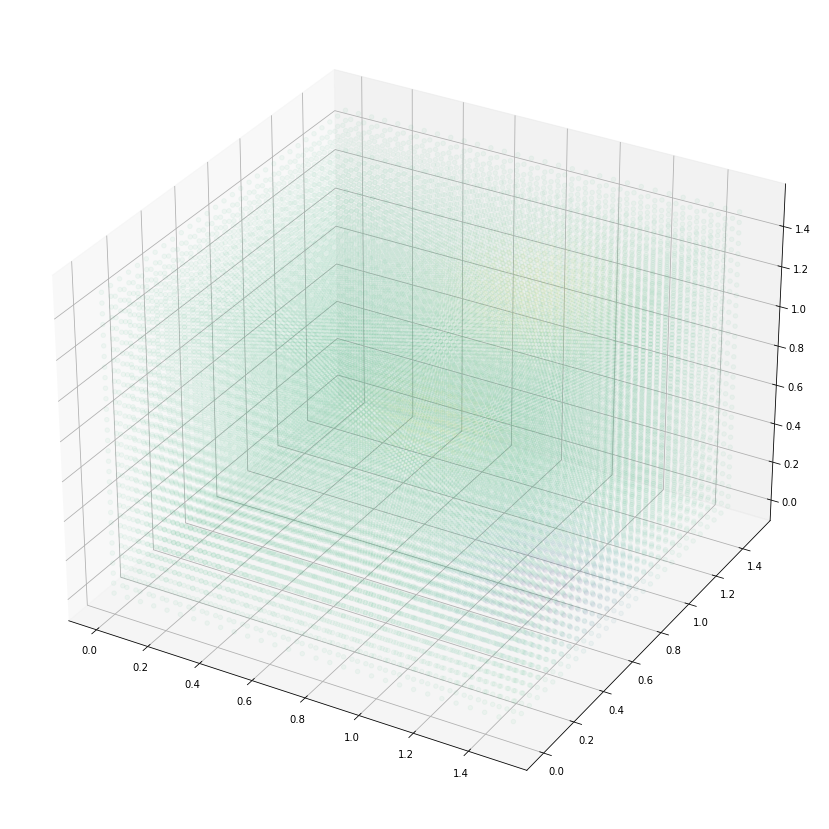

In [4]:
for problem_details in [problem_one_details, problem_two_details, problem_three_details]:
    # three ttoy examples

    # The abstract inerfaces in base.py of the ExcursionModel and AcquisitionFunction define a method set_params()
    # This allows the builders to control the kwargs of the model and acq function objects.
    base_model = build_model(model_type, grid=problem_details.rangedef, **base_model_kwargs)
    acq_func = build_acquisition_func(acq_type, device_opt=device, dtype=dtype)
    # We can see the usefulness of the abstract interface and builder design pattern in creating an optimizer and passing
    # along already created model and acq function objects. The set_params has ensured that the objects
    # passed into the optimizer will be on the same device and using the same data type of the optimizer.
    # If a user creates a custom model and implements the abstract interface, they will always be able to use
    # the optimizer class for solving their excursion problem.
    optimizer = Optimizer(problem_details=problem_details, base_model=base_model, acq_func=acq_func,
                          jump_start=jump_start, device=device_str, n_initial_points=n_initial_points,
                          initial_point_generator='random', fit_optimizer=fit_optimizer, base_model_kwargs={},
                          dtype='torch.float64', log=False)

    for x in range(10+plus_iterations):
        x = optimizer.ask()
        y = problem_details.functions[0](x)
        result = optimizer.tell(x, y)
        plot(result)